In [9]:
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

(train_input, train_target), (test_input, test_target) = \
imdb.load_data(num_words=500)

# 검증세트
train_input, val_input, train_target, val_target = \
train_test_split(train_input, train_target, test_size=.2, random_state=42)

C:\Anaconda3\lib\site-packages\tensorflow_core\python\keras\datasets\imdb.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Anaconda3\lib\site-packages\tensorflow_core\python\keras\datasets\imdb.py:130: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [4]:
# 시퀀스 데이터의 길이를 맞추는 함수 : pad_sequences()
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [5]:
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 800       
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


더 오래 기억할거니 말거니 -> 파라메터 200개에서 800개로 늘어남

In [8]:
# 모델 설정과 훈련
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])

# 복구점
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5')
# 조기종료
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, 
                                                  restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=100, batch_size = 64,
                    validation_data=(val_seq, val_target), 
                    callbacks=[checkpoint_cb, early_stopping_cb])

Train on 20000 samples, validate on 5000 samples
Epoch 1/100
20000/20000 [==============================] - 11s 538us/sample - loss: 0.6926 - accuracy: 0.5353 - val_loss: 0.6919 - val_accuracy: 0.5786
Epoch 2/100
20000/20000 [==============================] - 8s 411us/sample - loss: 0.6908 - accuracy: 0.6036 - val_loss: 0.6897 - val_accuracy: 0.6196
Epoch 3/100
20000/20000 [==============================] - 8s 410us/sample - loss: 0.6871 - accuracy: 0.6370 - val_loss: 0.6846 - val_accuracy: 0.6500
Epoch 4/100
20000/20000 [==============================] - 9s 439us/sample - loss: 0.6776 - accuracy: 0.6672 - val_loss: 0.6683 - val_accuracy: 0.6790
Epoch 5/100
20000/20000 [==============================] - 9s 427us/sample - loss: 0.6368 - accuracy: 0.7088 - val_loss: 0.5984 - val_accuracy: 0.7220
Epoch 6/100
20000/20000 [==============================] - 8s 412us/sample - loss: 0.5745 - accuracy: 0.7283 - val_loss: 0.5593 - val_accuracy: 0.7408
Epoch 7/100
20000/20000 [===================

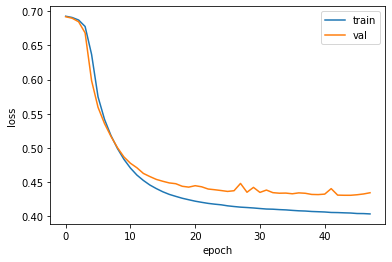

In [10]:
# 훈련손실과 검증손실 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [12]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))  # 과대적합 줄이기위해 dropout
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [13]:
# 모델 설정과 훈련
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model2.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])

# 복구점
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model2.h5')
# 조기종료
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, 
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size = 64,
                    validation_data=(val_seq, val_target), 
                    callbacks=[checkpoint_cb, early_stopping_cb])

Train on 20000 samples, validate on 5000 samples
Epoch 1/100
20000/20000 [==============================] - 11s 553us/sample - loss: 0.6928 - accuracy: 0.5262 - val_loss: 0.6917 - val_accuracy: 0.5666
Epoch 2/100
20000/20000 [==============================] - 9s 439us/sample - loss: 0.6903 - accuracy: 0.5775 - val_loss: 0.6882 - val_accuracy: 0.6156
Epoch 3/100
20000/20000 [==============================] - 9s 442us/sample - loss: 0.6837 - accuracy: 0.6276 - val_loss: 0.6773 - val_accuracy: 0.6572
Epoch 4/100
20000/20000 [==============================] - 9s 451us/sample - loss: 0.6558 - accuracy: 0.6776 - val_loss: 0.6200 - val_accuracy: 0.6890
Epoch 5/100
20000/20000 [==============================] - 9s 439us/sample - loss: 0.5919 - accuracy: 0.7078 - val_loss: 0.5754 - val_accuracy: 0.7228
Epoch 6/100
20000/20000 [==============================] - 9s 441us/sample - loss: 0.5628 - accuracy: 0.7295 - val_loss: 0.5574 - val_accuracy: 0.7380
Epoch 7/100
20000/20000 [===================

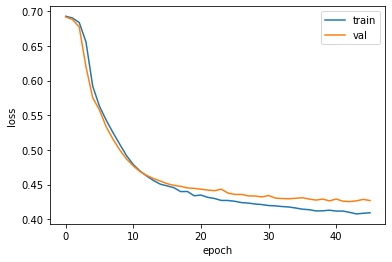

In [14]:
# 훈련손실과 검증손실 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

층 추가하면 정확도가 오를거같다

In [15]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True)) 
# return_sequences : 계속 보낼꺼야말꺼야(기억할꺼야?) -> 타임스탬프 전달
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

In [16]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 8)            800       
_________________________________________________________________
lstm_3 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [17]:
# 모델 설정과 훈련
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model3.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model3.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, 
                                                  restore_best_weights=True)

history = model3.fit(train_seq, train_target, epochs=100, batch_size = 64,
                    validation_data=(val_seq, val_target), 
                    callbacks=[checkpoint_cb, early_stopping_cb])

Train on 20000 samples, validate on 5000 samples
Epoch 1/100
20000/20000 [==============================] - 20s 1ms/sample - loss: 0.6930 - accuracy: 0.5053 - val_loss: 0.6928 - val_accuracy: 0.5208
Epoch 2/100
20000/20000 [==============================] - 16s 818us/sample - loss: 0.6921 - accuracy: 0.5767 - val_loss: 0.6914 - val_accuracy: 0.5718
Epoch 3/100
20000/20000 [==============================] - 16s 806us/sample - loss: 0.6881 - accuracy: 0.6115 - val_loss: 0.6828 - val_accuracy: 0.6670
Epoch 4/100
20000/20000 [==============================] - 17s 830us/sample - loss: 0.6544 - accuracy: 0.6687 - val_loss: 0.6099 - val_accuracy: 0.7098
Epoch 5/100
20000/20000 [==============================] - 16s 817us/sample - loss: 0.5781 - accuracy: 0.7235 - val_loss: 0.5581 - val_accuracy: 0.7338
Epoch 6/100
20000/20000 [==============================] - 16s 811us/sample - loss: 0.5472 - accuracy: 0.7379 - val_loss: 0.5322 - val_accuracy: 0.7452
Epoch 7/100
20000/20000 [================

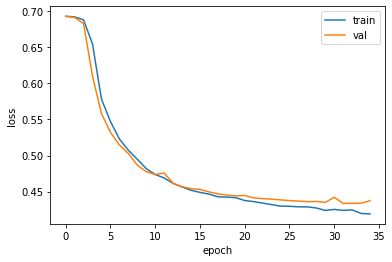

In [18]:
# 훈련손실과 검증손실 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()